In [1]:
#교차 검증
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = datasets.load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

#5개의 폴드 세트로 분리하는 KFold 객체
kf5 = KFold(n_splits=5)

#세트별 정확도를 담을 리스트
cv_accuracy = []

print('size of iris data set:', features.shape[0])

size of iris data set: 150


In [2]:
n_iter = 0
for train_idx, test_idx in kf5.split(features):
    X_train, X_test = features[train_idx], features[test_idx]
    y_train, y_test = label[train_idx], label[test_idx]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('{0} 검증 세트 인덱스:\n{1}'.format(n_iter, test_idx))
    cv_accuracy.append(accuracy)
    
print('\n검증 정확도 평균:', np.mean(cv_accuracy))

1 교차 검증 정확도: 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
1 검증 세트 인덱스:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
2 교차 검증 정확도: 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
2 검증 세트 인덱스:
[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
3 교차 검증 정확도: 0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
3 검증 세트 인덱스:
[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
4 교차 검증 정확도: 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
4 검증 세트 인덱스:
[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
5 교차 검증 정확도: 0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
5 검증 세트 인덱스:
[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

검증 정확도 평균: 0.9


In [3]:
#Stratified KFold (클래스가 불균형할 때 사용)
from sklearn.model_selection import StratifiedKFold

skf5 = StratifiedKFold(n_splits=5)

#세트별 정확도를 담을 리스트
cv_accuracy = []

In [4]:
n_iter = 0
for train_idx, test_idx in skf5.split(features, label):
    X_train, X_test = features[train_idx], features[test_idx]
    y_train, y_test = label[train_idx], label[test_idx]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('{0} 검증 세트 인덱스:\n{1}'.format(n_iter, test_idx))
    cv_accuracy.append(accuracy)
    
print('\n검증 정확도 평균:', np.mean(cv_accuracy))

1 교차 검증 정확도: 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
1 검증 세트 인덱스:
[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
2 교차 검증 정확도: 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
2 검증 세트 인덱스:
[ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]
3 교차 검증 정확도: 0.9, 학습 데이터 크기: 120, 검증 데이터 크기: 30
3 검증 세트 인덱스:
[ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]
4 교차 검증 정확도: 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
4 검증 세트 인덱스:
[ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]
5 교차 검증 정확도: 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
5 검증 세트 인덱스:
[ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]

검증 정확도 평균: 0.9600200000000001


In [5]:
#타이타닉 생존율 예측
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('data\\titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#컬럼들의 타입 확인
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
for i in titanic_df.columns:
    if len(set(titanic_df[i])) < 100:
        print(i, ':', set(titanic_df[i]))
    else:
        print(i, 'has', len(set(titanic_df[i])), 'data')

PassengerId has 891 data
Survived : {0, 1}
Pclass : {1, 2, 3}
Name has 891 data
Sex : {'female', 'male'}
Age has 265 data
SibSp : {0, 1, 2, 3, 4, 5, 8}
Parch : {0, 1, 2, 3, 4, 5, 6}
Ticket has 681 data
Fare has 248 data
Cabin has 148 data
Embarked : {'Q', nan, 'S', 'C'}


In [8]:
#null 값 처리 - 위에 보면 Age와 Cabin에 null 값이 많음
#Age는 평균 값으로
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

#Cabin은 고정값 'N'
titanic_df['Cabin'].fillna('N', inplace=True)

#Embarked는 고정값 'N'
titanic_df['Embarked'].fillna('N', inplace=True)

print('total num of null:', titanic_df.isnull().sum().sum())

total num of null: 0


In [9]:
#value_counts()로 각 특성의 분포 확인

print('Sex 특성값 분포:', titanic_df['Sex'].value_counts())
print('Cabin 특성값 분포:', titanic_df['Cabin'].value_counts())
print('Embarked 특성값 분포:', titanic_df['Embarked'].value_counts())

Sex 특성값 분포: male      577
female    314
Name: Sex, dtype: int64
Cabin 특성값 분포: N              687
G6               4
B96 B98          4
C23 C25 C27      4
D                3
              ... 
E68              1
B101             1
C104             1
C85              1
B71              1
Name: Cabin, Length: 148, dtype: int64
Embarked 특성값 분포: S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [10]:
#Cabin 특성값의 앞 문자만 추출해서 다시 Cabin 특성값으로 저장
titanic_df['Cabin'] = titanic_df['Cabin'].str[0]
print(titanic_df['Cabin'].head())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


In [11]:
#성별이 생존 확률에 어떤 영향을 주었는지 성별에 따른 생존자 수 비교
#barplot 이용

#Sex와 Survived를 그룹핑
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

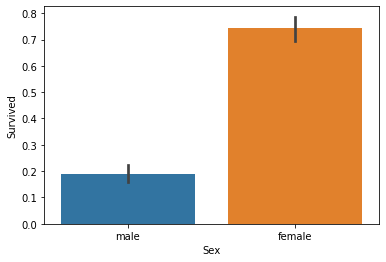

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.barplot(x='Sex', y='Survived', data=titanic_df)
#titanic_df 에서 Sex와 Survived를 갖고 막대그래프 그림

In [13]:
#1등실, 2등실, 3등실 사람 간의 생존 확률
titanic_df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

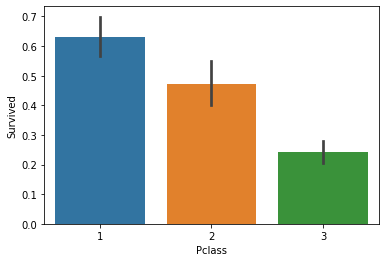

In [14]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df)

In [15]:
#Age에 따른 생존 확률 - Age를 범주화
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teen'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat

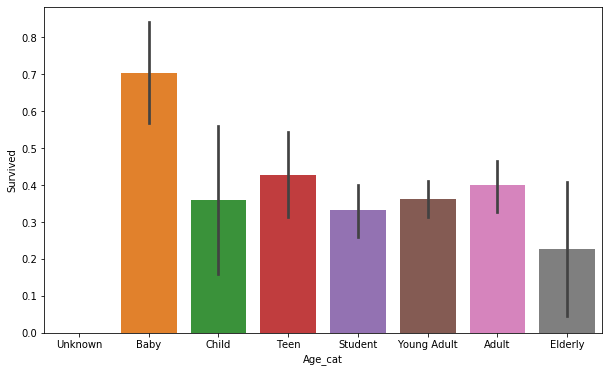

In [16]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:get_category(x))

plt.figure(figsize=(10,6))
group_names = ['Unknown', 'Baby', 'Child', 'Teen', 'Student', 'Young Adult', 'Adult', 'Elderly']
sns.barplot(x = 'Age_cat', y = 'Survived', data = titanic_df, order = group_names)

plt.show()

titanic_df.drop('Age_cat', axis=1, inplace=True)

In [17]:
#Sex, Cabin, Embarked 문자열 범주화 - LabelEncoder 사용하여 숫자를 범주 특성으로 변환
from sklearn.preprocessing import LabelEncoder

def encode_features(df):
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [18]:
#위에서 한 내용들 함수화
#null 처리 함수
from sklearn.preprocessing import LabelEncoder

#na 값 처리
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거 함수
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

#값 정리
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

titanic_df = encode_features(titanic_df)
titanic_df.head()

#모든 함수 한 번에 적용하는 함수
def transform_feature(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [19]:
titanic_df = pd.read_csv('data\\titanic_train.csv')
X_titanic_df = titanic_df.drop('Survived', axis=1)
y_titanic_df = titanic_df['Survived']
#데이터를 csv로 불러오고, target와 나머지로 분리

#위의 모든 함수 적용
X_titanic_df = transform_feature(X_titanic_df)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state=11)

In [20]:
#랜덤 포레스트, 의사결정트리, 로지스틱 회귀 분류의 정확도 비교
#모듈 임포트
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#객체 생성
rf_clf = RandomForestClassifier(random_state=11)
dt_clf = DecisionTreeClassifier(random_state=11)
lr_clf = LogisticRegression(random_state=11)

#랜덤 포레스트 예측, 정확도
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print('RFC accuracy: {0:0.4f}'.format(rf_accuracy))

#의사결정트리 예측, 정확도
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print('DTC accuracy: {0:0.4f}'.format(dt_accuracy))

RFC accuracy: 0.8547
DTC accuracy: 0.7877


In [21]:
#로지스틱 회귀 분류 예측, 정확도
#데이터가 정규화 되어있는지 확인
X_titanic_df.describe()
#물론 안 되어있음

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,5.946128,2.343434
std,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,2.062347,1.167398
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,7.000000,2.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,7.000000,3.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,7.000000,3.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,8.000000,3.000000


In [22]:
#예측에 앞서 정규화 먼저
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [23]:
lr_clf.fit(X_train_std, y_train)
lr_pred = lr_clf.predict(X_test_std)
lr_accuracy = accuracy_score(y_test, lr_pred)
print('LR accuracy: {0:0.4f}'.format(lr_accuracy))

LR accuracy: 0.8492


In [24]:
#데이터 양이 충분하지 않고, 최적화 작업을 수행하지 않았으므로
#교차 검증으로 결정 트리 모델을 좀 더 평가

#교차 검증 함수 생성
def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count, (train_idx, test_idx) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_idx], X_titanic_df.values[test_idx]
        y_train, y_test = y_titanic_df.values[train_idx], y_titanic_df.values[test_idx]
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
        
    print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

In [25]:
exec_kfold(rf_clf)

교차 검증 0 정확도: 0.7933
교차 검증 1 정확도: 0.8090
교차 검증 2 정확도: 0.8371
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.8596
평균 정확도: 0.8148


In [26]:
exec_kfold(dt_clf)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [27]:
exec_kfold(lr_clf)
#데이터 정규화하라는(아마도) 메시지 뜸

교차 검증 0 정확도: 0.8045
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7753
교차 검증 3 정확도: 0.7584
교차 검증 4 정확도: 0.8258
평균 정확도: 0.7890


C:\Users\student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

In [28]:
#confusion matrix - 정확도, 정밀도, 재현율 cross_val_score
from sklearn.model_selection import cross_val_score

def exec_cross_val_score(clf, folds=5):
    scores = cross_val_score(clf, X_titanic_df, y_titanic_df, cv=5)

    for iter_count, accuracy in enumerate(scores):
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

    print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

In [29]:
exec_cross_val_score(rf_clf)

교차 검증 0 정확도: 0.7933
교차 검증 1 정확도: 0.7978
교차 검증 2 정확도: 0.8483
교차 검증 3 정확도: 0.7640
교차 검증 4 정확도: 0.8652
평균 정확도: 0.8137


In [30]:
exec_cross_val_score(dt_clf)

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [31]:
exec_cross_val_score(lr_clf)

교차 검증 0 정확도: 0.7989
교차 검증 1 정확도: 0.7697
교차 검증 2 정확도: 0.7809
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.7978
평균 정확도: 0.7845


C:\Users\student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

In [32]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [2, 3, 5, 10],
             'min_samples_split': [2,3,5],
             'min_samples_leaf': [1,5,8]}
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))

best_dclf = grid_dclf.best_estimator_
pred = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715
